# Preprocessing


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

# Download the dataset
# Source of dataset - https://www.kaggle.com/rakeshrau/social-network-ads
# I saved my data in a fold named "data" in my Google drive
# Then I load the data by the following functions

from google.colab import drive
drive.mount('/content/gdrive')
data_path = "/content/gdrive/My Drive/aws-ec2.tar/"

# data = pd.read_csv(data_path+"data.ap-northeast-1.2021-01-08T14:52:59-08:00.xz")


# import lzma

# # Define the path to your .xz file in Google Drive
# file_path = "/content/gdrive/My Drive/aws-ec2.tar/data.ap-northeast-1.2021-01-08T14:52:59-08:00.xz"

# # Open the .xz file for reading
# with lzma.open(file_path, 'rb') as file:
#     # Read the content of the file
#     file_content = file.read()

# # Now you can work with the file content as needed
# # For example, you can print it:
# print(file_content)

# # Decode the content assuming it's in UTF-8 encoding
# decoded_content = file_content.decode('utf-8')

# # Now you can print the decoded content
# with open('output.txt', 'w', encoding='utf-8') as output_file:
#     output_file.write(decoded_content)

Mounted at /content/gdrive


In [ ]:
import lzma

# Define the path to your .xz file in Google Drive
file_path = "/content/gdrive/My Drive/aws-ec2.tar/data.ap-northeast-1.2021-01-08T14:52:59-08:00.xz"

# Define the chunk size (adjust as needed)
chunk_size = 100000  # 100 KB

# Open the .xz file for reading
with lzma.open(file_path, 'rb') as file:
    with open('output.txt', 'w', encoding='utf-8') as output_file:
        while True:
            chunk = file.read(chunk_size)
            if not chunk:
                break
            decoded_chunk = chunk.decode('utf-8')
            output_file.write(decoded_chunk)

print("Data has been written to 'output.txt'")

Data has been written to 'output.txt'


In [ ]:
import lzma
import os

# Directory where the .xz files are located
directory_path = "/content/gdrive/My Drive/ExcelExtract/"

# Define the common name of the files
common_name = "us-west-1"

# Define the output file path
output_file_path = "output-us-west-1.txt"

# Define the chunk size (adjust as needed)
chunk_size = 100000  # 100 KB

# Open the output file for writing
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # List files in the directory
    files = os.listdir(directory_path)

    # Iterate through the files
    for file_name in files:
        if common_name in file_name and file_name.endswith('.xz'):
            # Create the full file path
            file_path = os.path.join(directory_path, file_name)

            # Open the .xz file for reading
            with lzma.open(file_path, 'rb') as file:
                while True:
                    chunk = file.read(chunk_size)
                    if not chunk:
                        break
                    decoded_chunk = chunk.decode('utf-8')
                    output_file.write(decoded_chunk)

print("Merged data from multiple files into 'output-us-west-1.txt'")


Merged data from multiple files into 'output-us-west-1.txt'


In [ ]:
pwd

'/content'

In [ ]:
import os

# Directory where the .txt files are located (Colab local runtime directory)
directory_path = "/content/"

# List of input file names (adjust these based on your actual file names)
input_files = ["output-eu-north-1.txt", "output-us-west-1.txt", "output.txt"]

# Output file path
output_file_path = "/content/combined_output.txt"

# Open the output file for writing
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # Iterate through the input files and concatenate their contents
    for file_name in input_files:
        file_path = os.path.join(directory_path, file_name)
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as input_file:
                content = input_file.read()
                output_file.write(content)

print("Combined data from multiple files into 'combined_output.txt'")


Combined data from multiple files into 'combined_output.txt'


In [ ]:
import pandas as pd

# Input file path (the merged .txt file)
input_file_path = "/content/output.txt"

# Output Excel file path
output_excel_path = "/content/output.xlsx"

# Read the text file into a pandas DataFrame (assuming one column of data)
df = pd.read_csv(input_file_path, delimiter="\t", header=None, names=["Data"])

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Converted '{input_file_path}' to Excel file: '{output_excel_path}'")


Converted '/content/output.txt' to Excel file: '/content/output.xlsx'


# Analytics on ap-northeast-1 data

In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-ap-northeast-1.txt"

# Read the data into a Pandas DataFrame without headers
df_ap_northeast = pd.read_csv(data_path, delimiter="\t", header=None, names=["Spot Price", "DateandTime", "Instancetype", "ProductDescription"])
df_ap_northeast.reset_index(drop=True, inplace=True)
# print (df.head(10))
# Remove the first column (assuming it's the 0th column)
# df = df.iloc[:, 1:]



In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-ap-northeast-1.txt"

# Initialize an empty list to store dataframes
dfs = []

# Initialize variables to store data
spot_prices = []
dates = []
times = []
instance_types = []
product_descriptions = []

# Function to process each line
def process_line(line):
    parts = line.strip().split('\t')
    if len(parts) == 6:
        spot_price, _, datetime, instance_type, product_description, region = parts
        date, time = datetime.split("T")
        date = date.split("-")[0]  # Extract the year-month-day
        return spot_price, date, time, instance_type, product_description
    else:
        return None

# Read and process the data line by line
with open(data_path, 'r') as file:
    for line in file:
        data = process_line(line)
        if data is not None:
            spot_price, date, time, instance_type, product_description = data
            spot_prices.append(spot_price)
            dates.append(date)
            times.append(time)
            instance_types.append(instance_type)
            product_descriptions.append(product_description)

# Create a DataFrame from the processed data
df_ap_northeast = pd.DataFrame({
    "Spot Price": spot_prices,
    "Date": dates,
    "Time": times,
    "Instance Type": instance_types,
    "Product Description": product_descriptions
})

# Print the modified DataFrame
print((df_ap_northeast.head(10)).to_string(index=False))


       Spot Price Date          Time Instance Type                   Product Description
SPOTINSTANCEPRICE 2021 00:03:47-0700     i2.xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:47-0700     i2.xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:55-0700   m5d.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:55-0700   m5d.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:55-0700   m5d.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:54-0700  r5dn.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:54-0700  r5dn.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:54-0700  r5dn.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:42-0700    c4.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:00:42-0700    c4.2xlarge               SUSE Linux (Amazon VPC)


In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-ap-northeast-1.txt"

# Read the data into a Pandas DataFrame with tab as the delimiter and no headers
df_ap_northeast = pd.read_csv(data_path, delimiter="\t", header=None)

# Assuming that your data structure is as follows:
# Column 0: SPOTINSTANCEPRICE
# Column 1: 0.249000 (Spot Price)
# Column 2: 2021-11-03T00:06:13-0700 (DateandTime)
# Column 3: t3.2xlarge (Instance Type)
# Column 4: Red Hat Enterprise Linux (Amazon VPC) (Product Description)
# Column 5: us-west-1a (Region)

# Rename the columns
df_ap_northeast.columns = ["Category", "Spot Price", "DateandTime", "Instance Type", "Product Description", "Region"]

# Manually split the "DateandTime" column into "Date" and "Time"
df_ap_northeast["Date"] = df_ap_northeast["DateandTime"].str.split("T").str.get(0)
df_ap_northeast["Time"] = df_ap_northeast["DateandTime"].str.split("T").str.get(1).str.split("-").str.get(0)

# Rearrange the columns as per your requirement
df_ap_northeast = df_ap_northeast[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Drop the unwanted columns by selecting the columns you want to keep
df_ap_northeast = df_ap_northeast[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Reset the index
df_ap_northeast.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df_ap_northeast['Time'][:5])


0    00:03:47
1    00:03:47
2    00:00:55
3    00:00:55
4    00:00:55
Name: Time, dtype: object


In [ ]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_ap_northeast['Date'],
    'Spot Price': df_ap_northeast['Spot Price'],
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Group by Date and calculate the mean spot price for each date
daily_spot_price = df_combined.groupby('Date')['Spot Price'].mean().reset_index()

# Create an interactive time series plot
fig = px.line(daily_spot_price, x="Date", y="Spot Price", title="Combined Daily Spot Prices Over Time")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Spot Price (Mean)")
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_ap_northeast['Date'],
    'Spot Price': df_ap_northeast['Spot Price'],
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Extract the time component from the Date column
df_combined["Time"] = df_combined["Date"].dt.time

# Change the desired date to "2021-07-27"
desired_date = "2021-07-27"

# Filter the DataFrame for the desired date
filtered_data = df_combined[(df_combined["Date"].dt.strftime("%Y-%m-%d") == desired_date)]

# Create an interactive plot for the filtered data
fig = px.line(filtered_data, x="Time", y="Spot Price", title=f"Spot Price on {desired_date} for the Entire Day")
fig.update_xaxes(title_text="Time of Day")
fig.update_yaxes(title_text="Spot Price")
fig.show()


In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_ap_northeast['Date'],
    'Spot Price': df_ap_northeast['Spot Price'],
    'Instance Type': df_ap_northeast['Instance Type'],  # Assuming you have an 'Instance Type' column
}

df_combined = pd.DataFrame(data)

# Filter the DataFrame to select data for the "g4dn.xlarge" instance
df_filtered = df_combined[df_combined['Instance Type'] == 'g4dn.xlarge']

# Group by Date and calculate the count of spot price readings for each day
daily_spot_price_count = df_filtered.groupby('Date')['Spot Price'].count().reset_index()

# Display the count of spot price readings for each day
print(daily_spot_price_count)


           Date  Spot Price
0    2020-11-24          12
1    2020-11-25          24
2    2020-11-26          24
3    2020-11-27          12
4    2020-11-28          12
..          ...         ...
372  2021-12-01          72
373  2021-12-02          48
374  2021-12-03          48
375  2021-12-04          36
376  2021-12-05          24

[377 rows x 2 columns]


In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_ap_northeast['Date'],
    'Spot Price': df_ap_northeast['Spot Price'],
    'Instance Type': df_ap_northeast['Instance Type'],  # Assuming you have an 'Instance Type' column
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Extract the time component from the Date column
df_combined["Time"] = df_combined["Date"].dt.time

# Filter the DataFrame to select data for the specific date '2021-07-27'
desired_date = "2021-08-21"

# Filter the DataFrame for the desired date
filtered_data = df_combined[(df_combined['Date'].dt.strftime("%Y-%m-%d") == desired_date)]

# Get distinct timestamps for that day
distinct_timestamps = filtered_data['Time'].unique()

# Print the list of distinct timestamps for the single day
print(f"Distinct timestamps for {desired_date}:")
for timestamp in distinct_timestamps:
    print(timestamp)


Distinct timestamps for 2021-08-21:
00:00:00


In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_ap_northeast['Date'],
    'Spot Price': df_ap_northeast['Spot Price'],
    'Instance Type': df_ap_northeast['Instance Type'],  # Assuming you have an 'Instance Type' column
}

df_combined = pd.DataFrame(data)

# Find the minimum cost for an instance
minimum_cost = df_combined['Spot Price'].min()

print(f"Minimum cost for an instance: {minimum_cost:.5f}")


Minimum cost for an instance: 0.00160


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_ap_northeast['Date'],
    'Spot Price': df_ap_northeast['Spot Price'],
    'Instance Type': df_ap_northeast['Instance Type']
}

df_combined = pd.DataFrame(data)

# Function to plot average spot prices for a specific instance type
def plot_spot_prices(instance_type):
    # Filter the DataFrame for the specified instance type
    filtered_df = df_combined[df_combined['Instance Type'] == instance_type]

    # Group by Date and calculate the mean spot price for each date
    daily_spot_price = filtered_df.groupby('Date')['Spot Price'].mean().reset_index()

    # Create a time series plot for the combined daily spot prices
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spot_price["Date"], daily_spot_price["Spot Price"])
    plt.title(f"Daily Spot Prices for {instance_type} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Spot Price (Mean)")
    plt.grid(True)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create an interact widget for selecting the instance type
@interact(Instance_Type=instance_types)
def choose_instance_type(Instance_Type=instance_types[0]):
    plot_spot_prices(Instance_Type)


interactive(children=(Dropdown(description='Instance_Type', options=('i2.xlarge', 'm5d.2xlarge', 'r5dn.2xlarge…

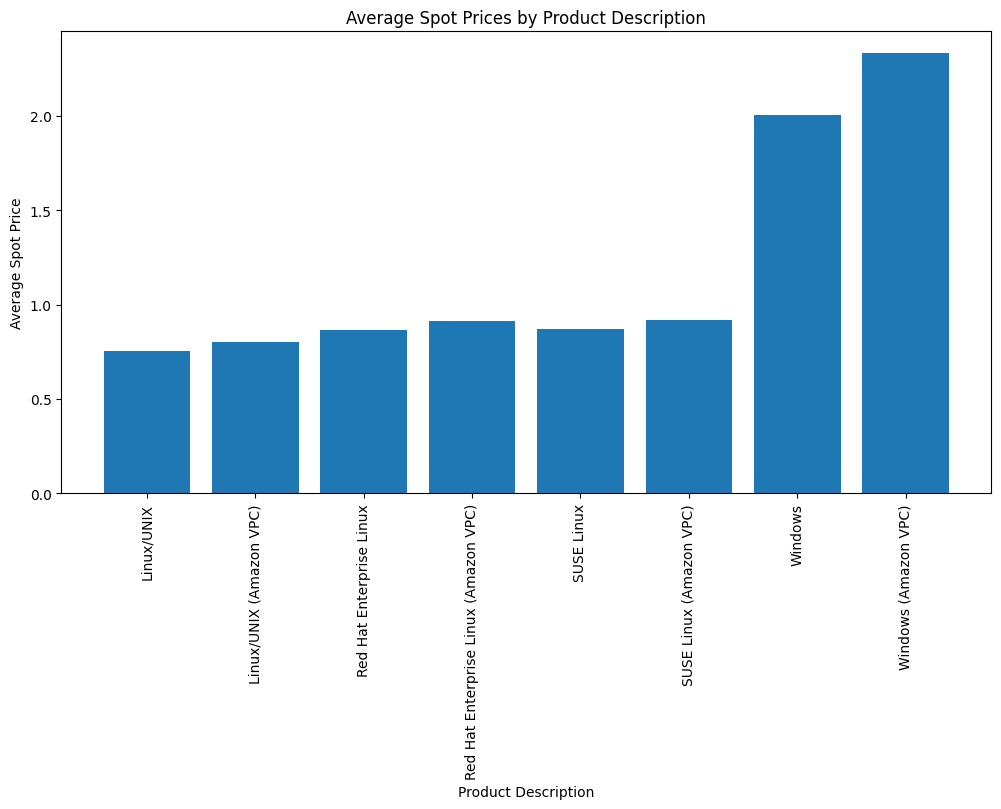

In [ ]:
# Group by Product Description and calculate mean spot prices
product_description_prices = df_ap_northeast.groupby('Product Description')['Spot Price'].mean().reset_index()

# Create a bar chart to visualize average spot prices by product description
plt.figure(figsize=(12, 6))
plt.bar(product_description_prices['Product Description'], product_description_prices['Spot Price'])
plt.title("Average Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Average Spot Price")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Instance Type': df_ap_northeast['Instance Type'],
    'Spot Price': df_ap_northeast['Spot Price']
}

df_combined = pd.DataFrame(data)

# Create a function to clear previous output
def clear_previous_output():
    clear_output(wait=True)

# Function to filter data by instance types and update the bar chart
def filter_and_update_plot(change):
    selected_instance_types = instance_type_dropdown.value
    clear_previous_output()  # Clear previous output

    # Filter the DataFrame for the selected instance types
    filtered_df = df_combined[df_combined['Instance Type'].isin(selected_instance_types)]

    # Group by Instance Type and calculate mean spot prices
    instance_type_prices = filtered_df.groupby('Instance Type')['Spot Price'].mean().reset_index()

    # Create a bar chart to visualize average spot prices for the selected instance types
    plt.figure(figsize=(12, 6))
    plt.bar(instance_type_prices['Instance Type'], instance_type_prices['Spot Price'])
    plt.title("Average Spot Prices for Selected Instance Types")
    plt.xlabel("Instance Type")
    plt.ylabel("Average Spot Price")
    plt.xticks(rotation=90)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create a dropdown widget for selecting multiple instance types
instance_type_dropdown = widgets.SelectMultiple(
    options=instance_types,
    description='Select Instance Types:'
)

# Create a button to trigger the filter action
filter_button = widgets.Button(description="Apply Filter")
filter_button.on_click(filter_and_update_plot)

# Display the widgets
display(instance_type_dropdown)
display(filter_button)


SelectMultiple(description='Select Instance Types:', options=('i2.xlarge', 'm5d.2xlarge', 'r5dn.2xlarge', 'c4.…

Button(description='Apply Filter', style=ButtonStyle())

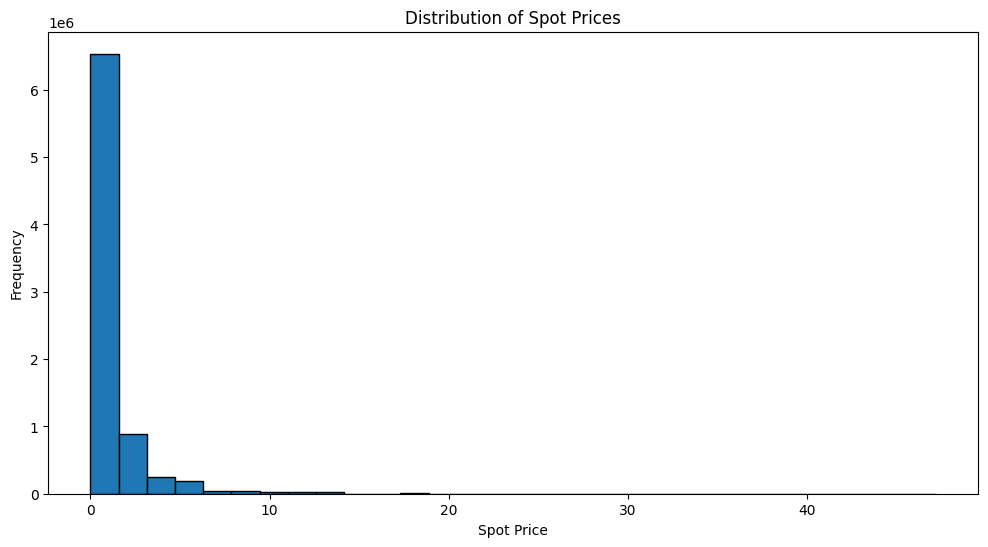

In [ ]:
# Create a histogram to visualize the distribution of spot prices
plt.figure(figsize=(12, 6))
plt.hist(df_ap_northeast['Spot Price'], bins=30, edgecolor='k')
plt.title("Distribution of Spot Prices")
plt.xlabel("Spot Price")
plt.ylabel("Frequency")
plt.show()


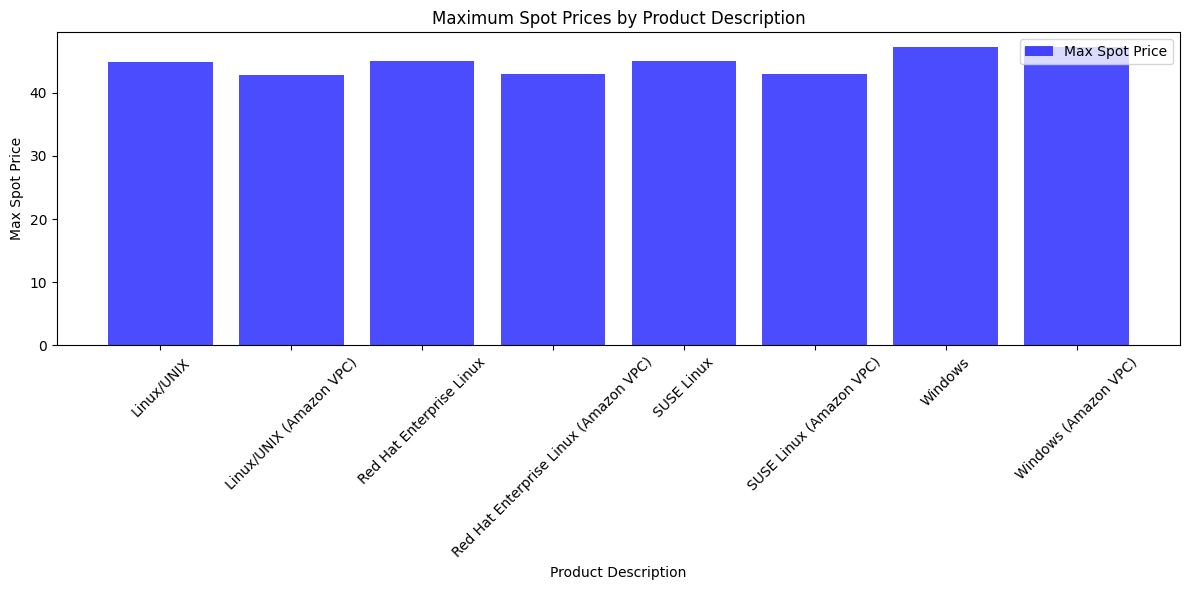

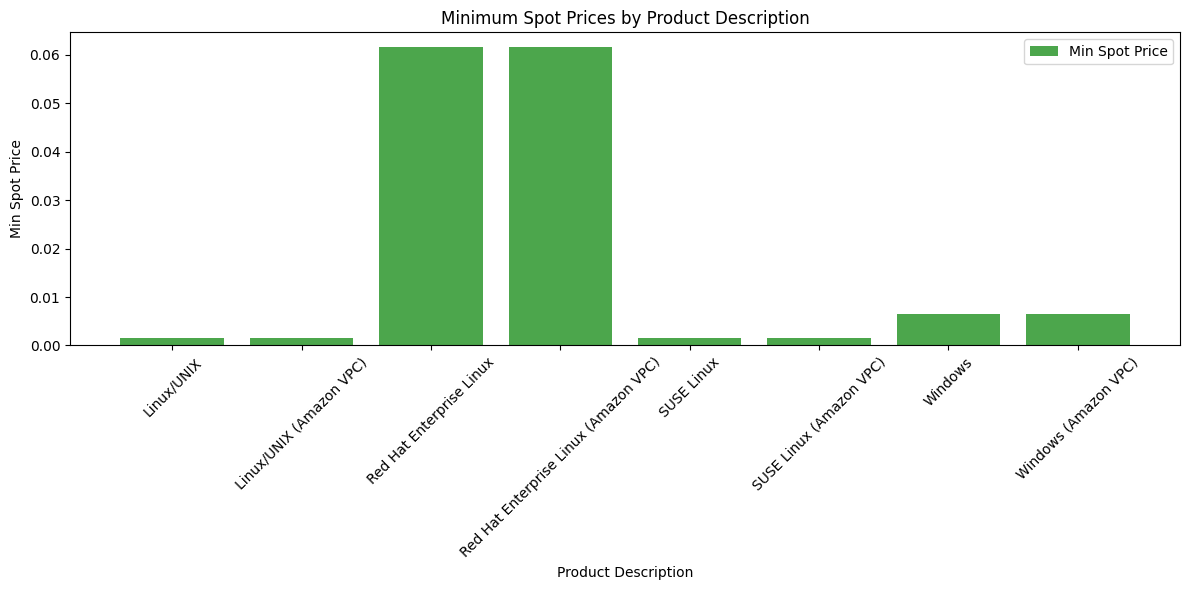

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Product Description': df_ap_northeast['Product Description'],
    'Spot Price': df_ap_northeast['Spot Price']
}

df_products = pd.DataFrame(data)

# Group by Product Description and calculate the maximum spot price for each product description
max_spot_price = df_products.groupby('Product Description')['Spot Price'].max().reset_index()

# Group by Product Description and calculate the minimum spot price for each product description
min_spot_price = df_products.groupby('Product Description')['Spot Price'].min().reset_index()

# Create a bar chart for maximum spot prices
plt.figure(figsize=(12, 6))
plt.bar(max_spot_price['Product Description'], max_spot_price['Spot Price'], label='Max Spot Price', alpha=0.7, color='blue')
plt.title("Maximum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Max Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()

# Create a bar chart for minimum spot prices
plt.figure(figsize=(12, 6))
plt.bar(min_spot_price['Product Description'], min_spot_price['Spot Price'], label='Min Spot Price', alpha=0.7, color='green')
plt.title("Minimum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Min Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()


In [ ]:
# print(product_price_stats)


# Analytics on eu-north-1 data

In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-eu-north-1.txt"

# Read the data into a Pandas DataFrame without headers
df_eu_north = pd.read_csv(data_path, delimiter="\t", header=None, names=["Spot Price", "DateandTime", "Instancetype", "ProductDescription"])
df_eu_north.reset_index(drop=True, inplace=True)
print (df_eu_north.head(10))
# Remove the first column (assuming it's the 0th column)
# df = df.iloc[:, 1:]



                 Spot Price  DateandTime              Instancetype  \
0  2021-11-03T23:33:59-0700  r6g.8xlarge  Red Hat Enterprise Linux   
1  2021-11-03T23:33:59-0700  r6g.8xlarge                SUSE Linux   
2  2021-11-03T23:33:59-0700  r6g.8xlarge                Linux/UNIX   
3  2021-11-03T23:26:29-0700   g4dn.metal                   Windows   
4  2021-11-03T23:13:14-0700  r5.16xlarge                   Windows   
5  2021-11-03T23:13:14-0700  r5.16xlarge                   Windows   
6  2021-11-03T23:13:14-0700  r5.16xlarge                   Windows   
7  2021-11-03T23:11:02-0700   c5.9xlarge  Red Hat Enterprise Linux   
8  2021-11-03T23:11:02-0700   c5.9xlarge  Red Hat Enterprise Linux   
9  2021-11-03T23:11:02-0700   c5.9xlarge  Red Hat Enterprise Linux   

  ProductDescription  
0        eu-north-1b  
1        eu-north-1b  
2        eu-north-1b  
3        eu-north-1a  
4        eu-north-1c  
5        eu-north-1b  
6        eu-north-1a  
7        eu-north-1c  
8        eu-north-1b  

In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-eu-north-1.txt"

# Read the data into a Pandas DataFrame with tab as the delimiter and no headers
df_eu_north = pd.read_csv(data_path, delimiter="\t", header=None)

# Assuming that your data structure is as follows:
# Column 0: SPOTINSTANCEPRICE
# Column 1: 0.249000 (Spot Price)
# Column 2: 2021-11-03T00:06:13-0700 (DateandTime)
# Column 3: t3.2xlarge (Instance Type)
# Column 4: Red Hat Enterprise Linux (Amazon VPC) (Product Description)
# Column 5: us-west-1a (Region)

# Rename the columns
df_eu_north.columns = ["Category", "Spot Price", "DateandTime", "Instance Type", "Product Description", "Region"]

# Manually split the "DateandTime" column into "Date" and "Time"
df_eu_north["Date"] = df_eu_north["DateandTime"].str.split("T").str.get(0)
df_eu_north["Time"] = df_eu_north["DateandTime"].str.split("T").str.get(1).str.split("-").str.get(0)

# Rearrange the columns as per your requirement
df_eu_north = df_eu_north[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Drop the unwanted columns by selecting the columns you want to keep
df_eu_north = df_eu_north[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Reset the index
df_eu_north.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df_eu_north['Spot Price'][:5])


0    0.6428
1    0.6628
2    0.5128
3    8.9911
4    3.9050
Name: Spot Price, dtype: float64


In [ ]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_eu_north['Date'],
    'Spot Price': df_eu_north['Spot Price'],
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Group by Date and calculate the mean spot price for each date
daily_spot_price = df_combined.groupby('Date')['Spot Price'].mean().reset_index()

# Create an interactive time series plot
fig = px.line(daily_spot_price, x="Date", y="Spot Price", title="Combined Daily Spot Prices Over Time")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Spot Price (Mean)")
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_eu_north['Date'],
    'Spot Price': df_eu_north['Spot Price'],
    'Instance Type': df_eu_north['Instance Type']
}

df_combined = pd.DataFrame(data)

# Function to plot average spot prices for a specific instance type
def plot_spot_prices(instance_type):
    # Filter the DataFrame for the specified instance type
    filtered_df = df_combined[df_combined['Instance Type'] == instance_type]

    # Group by Date and calculate the mean spot price for each date
    daily_spot_price = filtered_df.groupby('Date')['Spot Price'].mean().reset_index()

    # Create a time series plot for the combined daily spot prices
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spot_price["Date"], daily_spot_price["Spot Price"])
    plt.title(f"Daily Spot Prices for {instance_type} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Spot Price (Mean)")
    plt.grid(True)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create an interact widget for selecting the instance type
@interact(Instance_Type=instance_types)
def choose_instance_type(Instance_Type=instance_types[0]):
    plot_spot_prices(Instance_Type)


interactive(children=(Dropdown(description='Instance_Type', options=('r6g.8xlarge', 'g4dn.metal', 'r5.16xlarge…

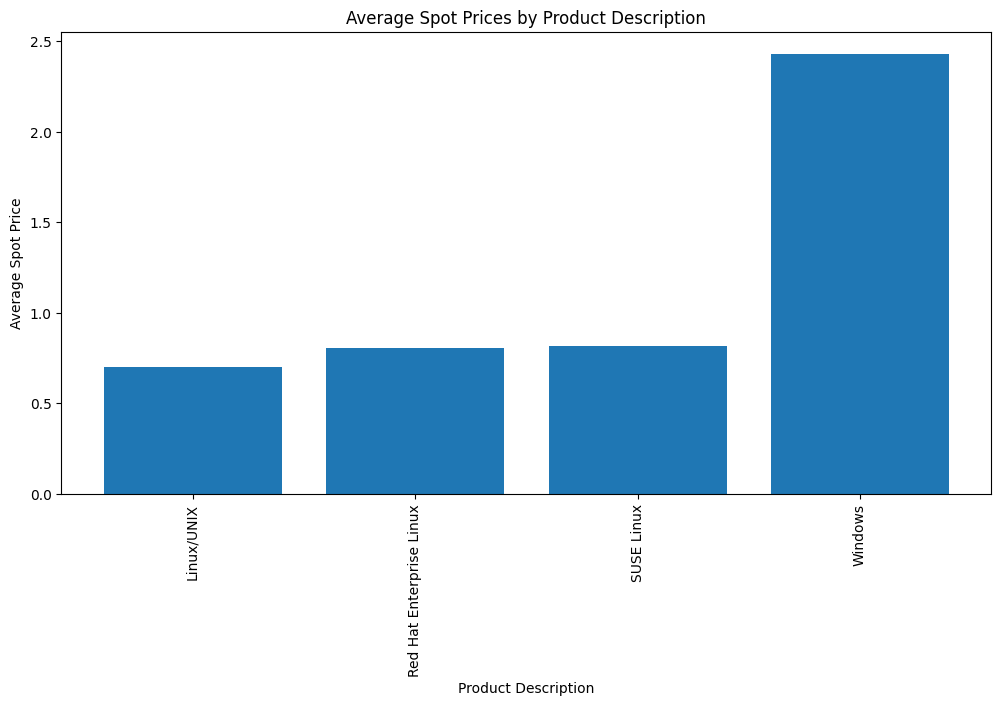

In [ ]:
# Group by Product Description and calculate mean spot prices
product_description_prices = df_eu_north.groupby('Product Description')['Spot Price'].mean().reset_index()

# Create a bar chart to visualize average spot prices by product description
plt.figure(figsize=(12, 6))
plt.bar(product_description_prices['Product Description'], product_description_prices['Spot Price'])
plt.title("Average Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Average Spot Price")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Instance Type': df_eu_north['Instance Type'],
    'Spot Price': df_eu_north['Spot Price']
}

df_combined = pd.DataFrame(data)

# Create a function to clear previous output
def clear_previous_output():
    clear_output(wait=True)

# Function to filter data by instance types and update the bar chart
def filter_and_update_plot(change):
    selected_instance_types = instance_type_dropdown.value
    clear_previous_output()  # Clear previous output

    # Filter the DataFrame for the selected instance types
    filtered_df = df_combined[df_combined['Instance Type'].isin(selected_instance_types)]

    # Group by Instance Type and calculate mean spot prices
    instance_type_prices = filtered_df.groupby('Instance Type')['Spot Price'].mean().reset_index()

    # Create a bar chart to visualize average spot prices for the selected instance types
    plt.figure(figsize=(12, 6))
    plt.bar(instance_type_prices['Instance Type'], instance_type_prices['Spot Price'])
    plt.title("Average Spot Prices for Selected Instance Types")
    plt.xlabel("Instance Type")
    plt.ylabel("Average Spot Price")
    plt.xticks(rotation=90)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create a dropdown widget for selecting multiple instance types
instance_type_dropdown = widgets.SelectMultiple(
    options=instance_types,
    description='Select Instance Types:'
)

# Create a button to trigger the filter action
filter_button = widgets.Button(description="Apply Filter")
filter_button.on_click(filter_and_update_plot)

# Display the widgets
display(instance_type_dropdown)
display(filter_button)


SelectMultiple(description='Select Instance Types:', options=('r6g.8xlarge', 'g4dn.metal', 'r5.16xlarge', 'c5.…

Button(description='Apply Filter', style=ButtonStyle())

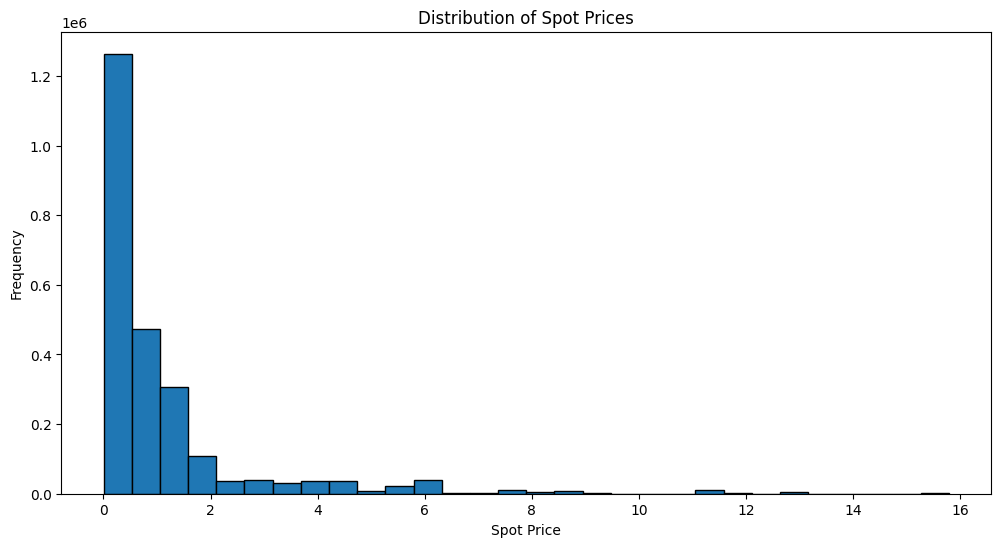

In [ ]:
# Create a histogram to visualize the distribution of spot prices
plt.figure(figsize=(12, 6))
plt.hist(df_eu_north['Spot Price'], bins=30, edgecolor='k')
plt.title("Distribution of Spot Prices")
plt.xlabel("Spot Price")
plt.ylabel("Frequency")
plt.show()


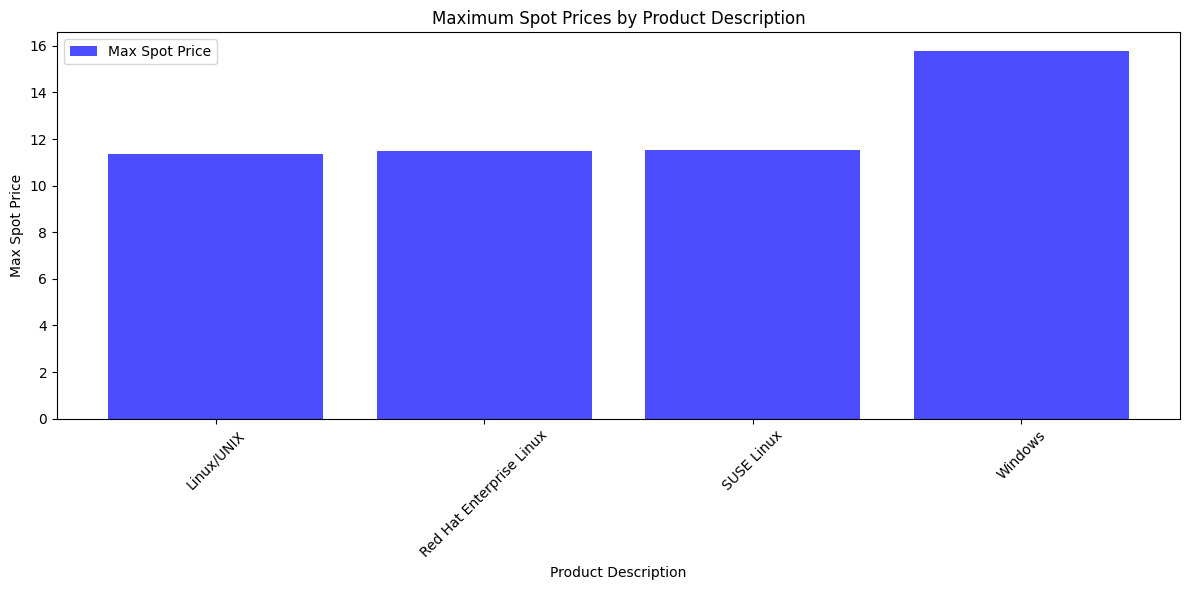

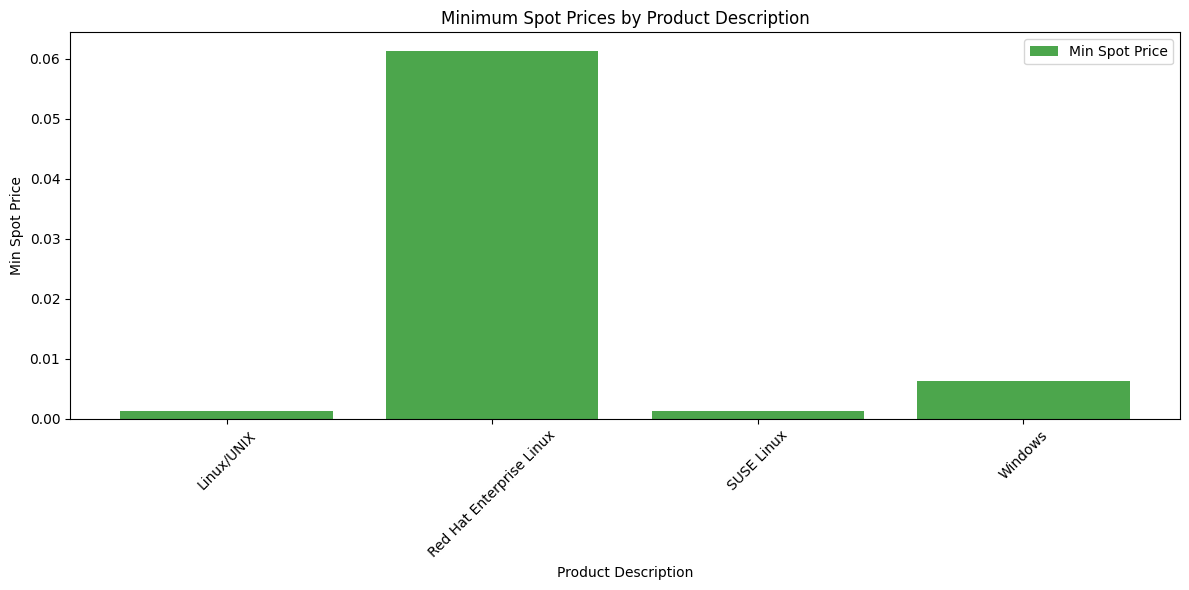

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Product Description': df_eu_north['Product Description'],
    'Spot Price': df_eu_north['Spot Price']
}

df_products = pd.DataFrame(data)

# Group by Product Description and calculate the maximum spot price for each product description
max_spot_price = df_products.groupby('Product Description')['Spot Price'].max().reset_index()

# Group by Product Description and calculate the minimum spot price for each product description
min_spot_price = df_products.groupby('Product Description')['Spot Price'].min().reset_index()

# Create a bar chart for maximum spot prices
plt.figure(figsize=(12, 6))
plt.bar(max_spot_price['Product Description'], max_spot_price['Spot Price'], label='Max Spot Price', alpha=0.7, color='blue')
plt.title("Maximum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Max Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()

# Create a bar chart for minimum spot prices
plt.figure(figsize=(12, 6))
plt.bar(min_spot_price['Product Description'], min_spot_price['Spot Price'], label='Min Spot Price', alpha=0.7, color='green')
plt.title("Minimum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Min Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()


# Analytics on us-west-1 data

In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Read the data into a Pandas DataFrame without headers
df_us_west = pd.read_csv(data_path, delimiter="\t", header=None, names=["Spot Price", "DateandTime", "Instancetype", "ProductDescription"])
df_us_west.reset_index(drop=True, inplace=True)
print (df_us_west.head(10))
# Remove the first column (assuming it's the 0th column)
# df = df.iloc[:, 1:]



                 Spot Price DateandTime  \
0  2021-11-03T00:06:13-0700  t3.2xlarge   
1  2021-11-03T00:06:13-0700  t3.2xlarge   
2  2021-11-03T00:06:13-0700  t3.2xlarge   
3  2021-11-03T00:06:13-0700  t3.2xlarge   
4  2021-11-03T00:06:13-0700  t3.2xlarge   
5  2021-11-03T00:06:13-0700  t3.2xlarge   
6  2021-11-03T00:03:07-0700  t3.2xlarge   
7  2021-11-03T00:03:07-0700  t3.2xlarge   
8  2021-11-03T00:01:32-0700  m5.4xlarge   
9  2021-11-03T00:01:32-0700  m5.4xlarge   

                            Instancetype ProductDescription  
0  Red Hat Enterprise Linux (Amazon VPC)         us-west-1a  
1  Red Hat Enterprise Linux (Amazon VPC)         us-west-1b  
2                SUSE Linux (Amazon VPC)         us-west-1a  
3                SUSE Linux (Amazon VPC)         us-west-1b  
4                Linux/UNIX (Amazon VPC)         us-west-1a  
5                Linux/UNIX (Amazon VPC)         us-west-1b  
6                   Windows (Amazon VPC)         us-west-1a  
7                   Windows (A

In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Initialize an empty list to store dataframes
dfs = []

# Initialize variables to store data
spot_prices = []
dates = []
times = []
instance_types = []
product_descriptions = []

# Function to process each line
def process_line(line):
    parts = line.strip().split('\t')
    if len(parts) == 6:
        spot_price, _, datetime, instance_type, product_description, region = parts
        date, time = datetime.split("T")
        date = date.split("-")[0]  # Extract the year-month-day
        return spot_price, date, time, instance_type, product_description
    else:
        return None

# Read and process the data line by line
with open(data_path, 'r') as file:
    for line in file:
        data = process_line(line)
        if data is not None:
            spot_price, date, time, instance_type, product_description = data
            spot_prices.append(spot_price)
            dates.append(date)
            times.append(time)
            instance_types.append(instance_type)
            product_descriptions.append(product_description)

# Create a DataFrame from the processed data
df_us_west = pd.DataFrame({
    "Spot Price": spot_prices,
    "Date": dates,
    "Time": times,
    "Instance Type": instance_types,
    "Product Description": product_descriptions
})

# Print the modified DataFrame
print((df_us_west.head(10)).to_string(index=False))


       Spot Price Date          Time Instance Type                   Product Description
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge               SUSE Linux (Amazon VPC)


In [ ]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Read the data into a Pandas DataFrame with tab as the delimiter and no headers
df_us_west = pd.read_csv(data_path, delimiter="\t", header=None)

# Assuming that your data structure is as follows:
# Column 0: SPOTINSTANCEPRICE
# Column 1: 0.249000 (Spot Price)
# Column 2: 2021-11-03T00:06:13-0700 (DateandTime)
# Column 3: t3.2xlarge (Instance Type)
# Column 4: Red Hat Enterprise Linux (Amazon VPC) (Product Description)
# Column 5: us-west-1a (Region)

# Rename the columns
df_us_west.columns = ["Category", "Spot Price", "DateandTime", "Instance Type", "Product Description", "Region"]

# Manually split the "DateandTime" column into "Date" and "Time"
df_us_west["Date"] = df_us_west["DateandTime"].str.split("T").str.get(0)
df_us_west["Time"] = df_us_west["DateandTime"].str.split("T").str.get(1).str.split("-").str.get(0)

# Rearrange the columns as per your requirement
df_us_west = df_us_west[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Drop the unwanted columns by selecting the columns you want to keep
df_us_west = df_us_west[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Reset the index
df_us_west.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df_us_west['Spot Price'][:5])


0    0.249
1    0.249
2    0.269
3    0.269
4    0.119
Name: Spot Price, dtype: float64


In [ ]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_us_west['Date'],
    'Spot Price': df_us_west['Spot Price'],
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Group by Date and calculate the mean spot price for each date
daily_spot_price = df_combined.groupby('Date')['Spot Price'].mean().reset_index()

# Create an interactive time series plot
fig = px.line(daily_spot_price, x="Date", y="Spot Price", title="Combined Daily Spot Prices Over Time")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Spot Price (Mean)")
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df_us_west['Date'],
    'Spot Price': df_us_west['Spot Price'],
    'Instance Type': df_us_west['Instance Type']
}

df_combined = pd.DataFrame(data)

# Function to plot average spot prices for a specific instance type
def plot_spot_prices(instance_type):
    # Filter the DataFrame for the specified instance type
    filtered_df = df_combined[df_combined['Instance Type'] == instance_type]

    # Group by Date and calculate the mean spot price for each date
    daily_spot_price = filtered_df.groupby('Date')['Spot Price'].mean().reset_index()

    # Create a time series plot for the combined daily spot prices
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spot_price["Date"], daily_spot_price["Spot Price"])
    plt.title(f"Daily Spot Prices for {instance_type} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Spot Price (Mean)")
    plt.grid(True)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create an interact widget for selecting the instance type
@interact(Instance_Type=instance_types)
def choose_instance_type(Instance_Type=instance_types[0]):
    plot_spot_prices(Instance_Type)


interactive(children=(Dropdown(description='Instance_Type', options=('t3.2xlarge', 'm5.4xlarge', 'r5.2xlarge',…

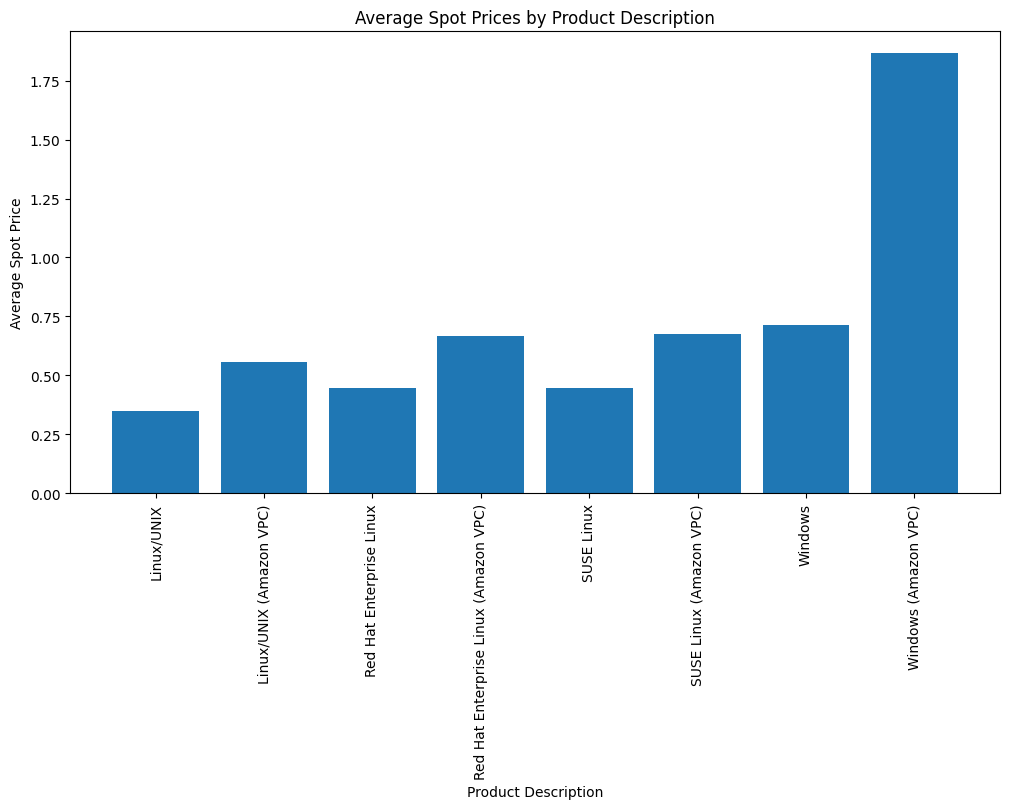

In [ ]:
# Group by Product Description and calculate mean spot prices
product_description_prices = df_us_west.groupby('Product Description')['Spot Price'].mean().reset_index()

# Create a bar chart to visualize average spot prices by product description
plt.figure(figsize=(12, 6))
plt.bar(product_description_prices['Product Description'], product_description_prices['Spot Price'])
plt.title("Average Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Average Spot Price")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Instance Type': df_us_west['Instance Type'],
    'Spot Price': df_us_west['Spot Price']
}

df_combined = pd.DataFrame(data)

# Create a function to clear previous output
def clear_previous_output():
    clear_output(wait=True)

# Function to filter data by instance types and update the bar chart
def filter_and_update_plot(change):
    selected_instance_types = instance_type_dropdown.value
    clear_previous_output()  # Clear previous output

    # Filter the DataFrame for the selected instance types
    filtered_df = df_combined[df_combined['Instance Type'].isin(selected_instance_types)]

    # Group by Instance Type and calculate mean spot prices
    instance_type_prices = filtered_df.groupby('Instance Type')['Spot Price'].mean().reset_index()

    # Create a bar chart to visualize average spot prices for the selected instance types
    plt.figure(figsize=(12, 6))
    plt.bar(instance_type_prices['Instance Type'], instance_type_prices['Spot Price'])
    plt.title("Average Spot Prices for Selected Instance Types")
    plt.xlabel("Instance Type")
    plt.ylabel("Average Spot Price")
    plt.xticks(rotation=90)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create a dropdown widget for selecting multiple instance types
instance_type_dropdown = widgets.SelectMultiple(
    options=instance_types,
    description='Select Instance Types:'
)

# Create a button to trigger the filter action
filter_button = widgets.Button(description="Apply Filter")
filter_button.on_click(filter_and_update_plot)

# Display the widgets
display(instance_type_dropdown)
display(filter_button)


SelectMultiple(description='Select Instance Types:', options=('t3.2xlarge', 'm5.4xlarge', 'r5.2xlarge', 'r4.8x…

Button(description='Apply Filter', style=ButtonStyle())

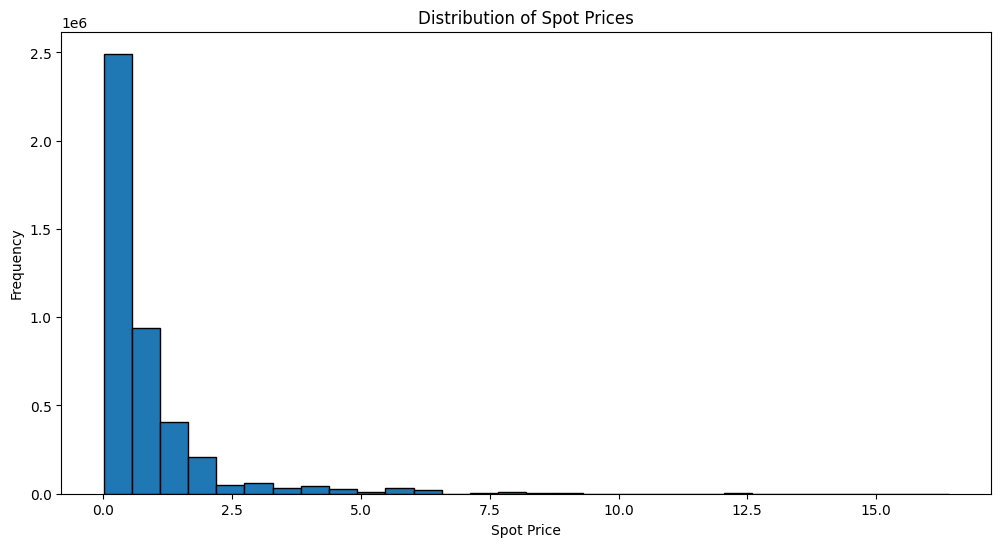

In [ ]:
# Create a histogram to visualize the distribution of spot prices
plt.figure(figsize=(12, 6))
plt.hist(df_us_west['Spot Price'], bins=30, edgecolor='k')
plt.title("Distribution of Spot Prices")
plt.xlabel("Spot Price")
plt.ylabel("Frequency")
plt.show()


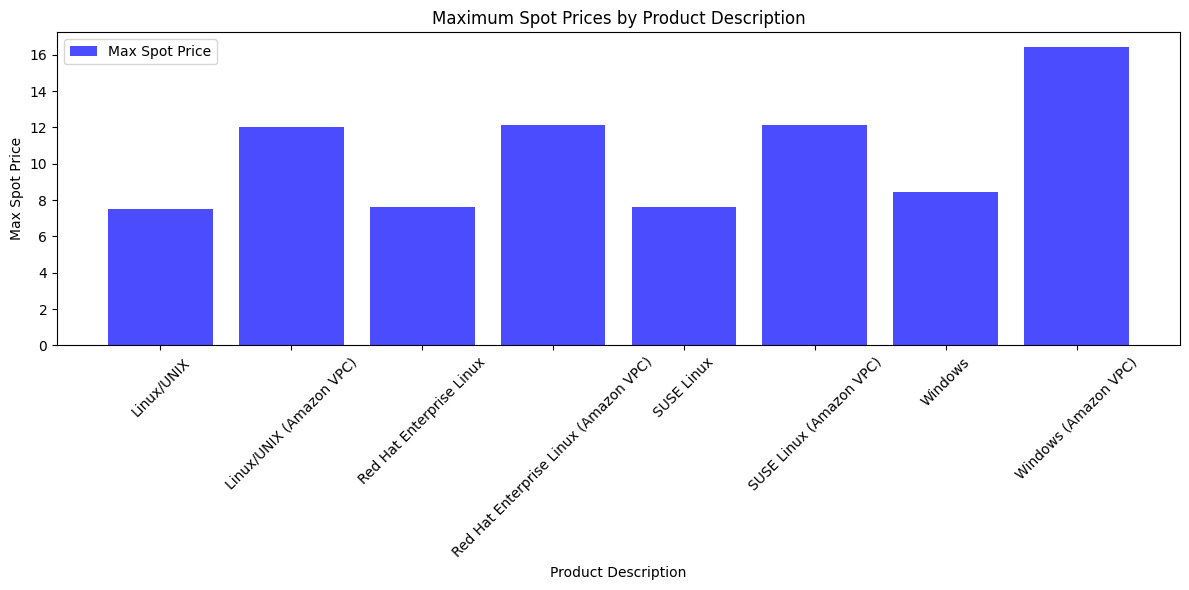

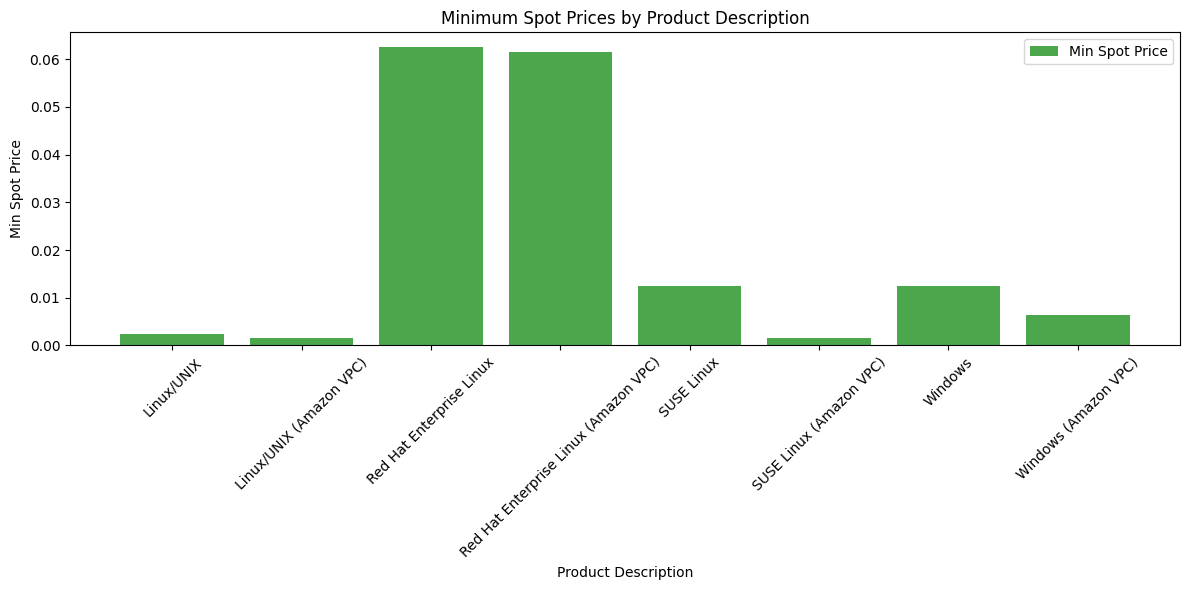

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Product Description': df_us_west['Product Description'],
    'Spot Price': df_us_west['Spot Price']
}

df_products = pd.DataFrame(data)

# Group by Product Description and calculate the maximum spot price for each product description
max_spot_price = df_products.groupby('Product Description')['Spot Price'].max().reset_index()

# Group by Product Description and calculate the minimum spot price for each product description
min_spot_price = df_products.groupby('Product Description')['Spot Price'].min().reset_index()

# Create a bar chart for maximum spot prices
plt.figure(figsize=(12, 6))
plt.bar(max_spot_price['Product Description'], max_spot_price['Spot Price'], label='Max Spot Price', alpha=0.7, color='blue')
plt.title("Maximum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Max Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()

# Create a bar chart for minimum spot prices
plt.figure(figsize=(12, 6))
plt.bar(min_spot_price['Product Description'], min_spot_price['Spot Price'], label='Min Spot Price', alpha=0.7, color='green')
plt.title("Minimum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Min Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()


# Merge Dataframes and setting spot threshold.

In [ ]:
import pandas as pd

# Assuming you have the three dataframes: df_ap_northeast, df_eu_north, df_us_west

# Add a 'Region' column to each dataframe
df_ap_northeast['Region'] = 'ap_northeast'
df_eu_north['Region'] = 'eu_north'
df_us_west['Region'] = 'us_west'

# Combine the dataframes
combined_df = pd.concat([df_ap_northeast, df_eu_north, df_us_west], ignore_index=True)

# Display the combined dataframe
print(combined_df.head())


   Spot Price        Date      Time Instance Type  \
0      0.4123  2021-11-03  00:03:47     i2.xlarge   
1      0.4123  2021-11-03  00:03:47     i2.xlarge   
2      0.3107  2021-11-03  00:00:55   m5d.2xlarge   
3      0.2807  2021-11-03  00:00:55   m5d.2xlarge   
4      0.1807  2021-11-03  00:00:55   m5d.2xlarge   

                     Product Description        Region  
0                   Windows (Amazon VPC)  ap_northeast  
1                   Windows (Amazon VPC)  ap_northeast  
2  Red Hat Enterprise Linux (Amazon VPC)  ap_northeast  
3                SUSE Linux (Amazon VPC)  ap_northeast  
4                Linux/UNIX (Amazon VPC)  ap_northeast  


In [ ]:
from tabulate import tabulate

# Display the combined dataframe in a tabular format
print(tabulate(combined_df.head(), headers='keys', tablefmt='pretty'))

+---+------------+------------+----------+---------------+---------------------------------------+--------------+
|   | Spot Price |    Date    |   Time   | Instance Type |          Product Description          |    Region    |
+---+------------+------------+----------+---------------+---------------------------------------+--------------+
| 0 |   0.4123   | 2021-11-03 | 00:03:47 |   i2.xlarge   |         Windows (Amazon VPC)          | ap_northeast |
| 1 |   0.4123   | 2021-11-03 | 00:03:47 |   i2.xlarge   |         Windows (Amazon VPC)          | ap_northeast |
| 2 |   0.3107   | 2021-11-03 | 00:00:55 |  m5d.2xlarge  | Red Hat Enterprise Linux (Amazon VPC) | ap_northeast |
| 3 |   0.2807   | 2021-11-03 | 00:00:55 |  m5d.2xlarge  |        SUSE Linux (Amazon VPC)        | ap_northeast |
| 4 |   0.1807   | 2021-11-03 | 00:00:55 |  m5d.2xlarge  |        Linux/UNIX (Amazon VPC)        | ap_northeast |
+---+------------+------------+----------+---------------+------------------------------

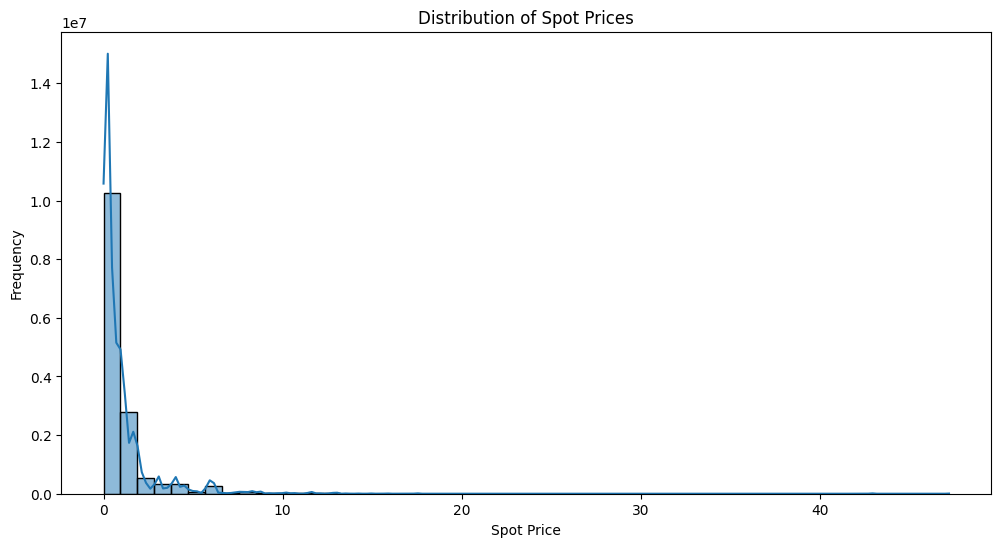

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of spot prices
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['Spot Price'], bins=50, kde=True)
plt.title('Distribution of Spot Prices')
plt.xlabel('Spot Price')
plt.ylabel('Frequency')
plt.show()


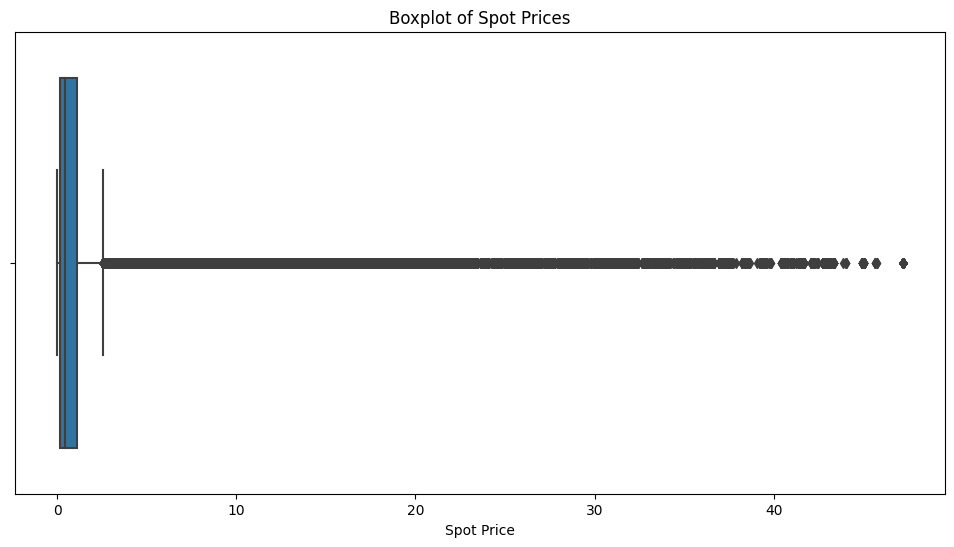

In [ ]:
# Box plot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=combined_df['Spot Price'])
plt.title('Boxplot of Spot Prices')
plt.show()


In [ ]:
# Calculate percentiles for reference
percentiles = [0, 25, 50, 75, 90, 95, 99]
percentile_values = combined_df['Spot Price'].quantile([p / 100 for p in percentiles])
print(f'Percentile Values:\n{percentile_values}')

# Set a threshold based on analysis
# Example: Using 90th percentile as a threshold
reliability_threshold = percentile_values[0.9]
print(f'Reliability Threshold: {reliability_threshold}')


Percentile Values:
0.00    0.0013
0.25    0.1477
0.50    0.4445
0.75    1.1078
0.90    2.0616
0.95    4.0618
0.99    8.3000
Name: Spot Price, dtype: float64
Reliability Threshold: 2.0616


In [ ]:
import pickle
# Save the original DataFrame
with open('original_combined_df.pkl', 'wb') as file:
    pickle.dump(combined_df, file)
# Features
features = ['Date', 'Region', 'Instance Type', 'Product Description']

# Target variable
target = 'Spot Price'


# Save features and target variable information
with open('features_target_info.pkl', 'wb') as file:
    pickle.dump({'features': features, 'target': target}, file)


In [ ]:
%reset -f

In [ ]:
import pickle

# Load the original DataFrame
with open('original_combined_df.pkl', 'rb') as file:
    combined_df = pickle.load(file)

# Load features and target variable information
with open('features_target_info.pkl', 'rb') as file:
    info = pickle.load(file)

features = info['features']
target = info['target']


In [ ]:
from tabulate import tabulate

# Display the combined dataframe in a tabular format
print(tabulate(combined_df.head(), headers='keys', tablefmt='pretty'))

+---+------------+------------+----------+---------------+---------------------------------------+--------------+
|   | Spot Price |    Date    |   Time   | Instance Type |          Product Description          |    Region    |
+---+------------+------------+----------+---------------+---------------------------------------+--------------+
| 0 |   0.4123   | 2021-11-03 | 00:03:47 |   i2.xlarge   |         Windows (Amazon VPC)          | ap_northeast |
| 1 |   0.4123   | 2021-11-03 | 00:03:47 |   i2.xlarge   |         Windows (Amazon VPC)          | ap_northeast |
| 2 |   0.3107   | 2021-11-03 | 00:00:55 |  m5d.2xlarge  | Red Hat Enterprise Linux (Amazon VPC) | ap_northeast |
| 3 |   0.2807   | 2021-11-03 | 00:00:55 |  m5d.2xlarge  |        SUSE Linux (Amazon VPC)        | ap_northeast |
| 4 |   0.1807   | 2021-11-03 | 00:00:55 |  m5d.2xlarge  |        Linux/UNIX (Amazon VPC)        | ap_northeast |
+---+------------+------------+----------+---------------+------------------------------

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

# Identify categorical columns
categorical_columns = ['Date', 'Region', 'Instance Type', 'Product Description']

# Separate categorical and non-categorical columns
non_categorical_columns = [col for col in features if col not in categorical_columns]

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder(sparse=True, drop='first')  # Adjust drop parameter based on your requirements
encoded_categorical = onehot_encoder.fit_transform(combined_df[categorical_columns])

# Combine one-hot encoded categorical columns with non-categorical columns
encoded_df_sparse = hstack([encoded_categorical, csr_matrix(combined_df[non_categorical_columns])])

# Set the reliability threshold based on the 90th percentile of 'Spot Price'
reliability_threshold = combined_df['Spot Price'].quantile(0.90)

# Create a binary target variable indicating reliability
combined_df['Reliability'] = combined_df['Spot Price'] <= reliability_threshold

# Add the binary 'Reliability' column to the sparse matrix
encoded_df_sparse = hstack([encoded_df_sparse, csr_matrix(combined_df['Reliability'].values.reshape(-1, 1))])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
!nvidia-smi
# # This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/env-check.py
# # This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
# !bash rapidsai-csp-utils/colab/update_gcc.sh
# import os
# os._exit(00)
# # This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
# import condacolab
# condacolab.install()
# # you can now run the rest of the cells as normal
# import condacolab
# condacolab.check()
# # Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# # The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# !python rapidsai-csp-utils/colab/install_rapids.py stable
# import os
# os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
# os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
# os.environ['CONDA_PREFIX'] = '/usr/local'

# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

!pip install pyarrow==12.0.1
!pip install cchardet

Mon Dec 18 01:05:40 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==23.12.* dask-cudf-cu12==23.12.* cuml-cu12==23.12.* \
    cugraph-cu12==23.12.* cuspatial-cu12==23.12.* cuproj-cu12==23.12.* \
    cuxfilter-cu12==23.12.* cucim-cu12==23.12.* pylibraft-cu12==23.12.* \
    raft-dask-cu12==23.12.*

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl (38.0 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 12.0.1
    Uninstalling pyarrow-12.0.1:
      Successfully uninstalled pyarrow-12.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu11 23.10.2 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.3.0 which is incompatible.
cudf-cu11 23.10.2 requires pyarrow==12.*, but you have pyarrow 14.0.1 which is incompatible.
cugraph-cu11 23.10.0 requires dask==2023.9.2, but you have dask 2023.11.0 which is incompatible.
cugraph-cu11 23.10.0 requires dask-cuda==23.10.*, but you have dask-cuda 23.12.0 which is incompatible.
cugraph-cu11 23.10.0 requires distributed==2023.9.2, but you have distributed 2023.11.0 which is incompatible.
cum

In [ ]:
import cuml

/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [ ]:
#Random sample approach
from cuml.neighbors import KNeighborsClassifier
from cuml.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the number of iterations and the overall sample fraction
num_iterations = 5
overall_sample_fraction = 0.35  # You can adjust this value

# Initialize an array to store accuracy scores
accuracy_scores = []

for iteration in range(num_iterations):
    # Sample a fraction of your data
    sample_fraction = overall_sample_fraction / num_iterations
    sampled_df = combined_df.sample(frac=sample_fraction, random_state=iteration)

    # Extract features and target variable from the sampled data
    X_sample = sampled_df[['Region', 'Instance Type', 'Product Description']]
    y_sample = sampled_df['Reliability']

    # Convert categorical features to numerical using one-hot encoding
    X_sample_encoded = pd.get_dummies(X_sample)

    # Convert sparse data to dense
    X_sample_dense = X_sample_encoded.values

    # Split the data into training and testing sets
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
        X_sample_dense, y_sample, test_size=0.2, random_state=42
    )

    # Initialize the KNN classifier
    knn_classifier_gpu_sample = KNeighborsClassifier(n_neighbors=5)

    # Train the model on the sampled training set
    knn_classifier_gpu_sample.fit(X_train_sample, y_train_sample)

    # Make predictions on the sampled test set
    predictions_gpu_sample = knn_classifier_gpu_sample.predict(X_test_sample)

    # Evaluate the model using accuracy and store the result
    accuracy_gpu_sample = accuracy_score(y_test_sample, predictions_gpu_sample)
    accuracy_scores.append(accuracy_gpu_sample)

# Calculate and print the average accuracy over all iterations
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy over {num_iterations} iterations: {average_accuracy:.2%}')


Average Accuracy over 5 iterations: 97.91%


# Researching ML models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming encoded_df_sparse is your feature matrix (including both categorical and non-categorical features)
X = encoded_df_sparse[:, :-1]  # Exclude the target variable
y = encoded_df_sparse[:, -1].toarray().ravel()  # Extract the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Train the model on the entire training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set in batches
batch_size = 1000
num_samples = X_test.shape[0]
num_batches = num_samples // batch_size

predictions = []

# Iterate through batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size

    # Make predictions for the current batch
    batch_predictions = knn_classifier.predict(X_test[start_idx:end_idx])

    # Append batch predictions to the overall predictions list
    predictions.extend(batch_predictions)

    # Print progress
    print(f"Batch {i + 1}/{num_batches} completed")

# Make predictions for the remaining samples (if any)
remaining_samples = num_samples % batch_size
if remaining_samples > 0:
    batch_predictions = knn_classifier.predict(X_test[-remaining_samples:])
    predictions.extend(batch_predictions)
    print(f"Remaining samples completed")

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Batch 1/2963 completed
Batch 2/2963 completed
Batch 3/2963 completed
Batch 4/2963 completed
Batch 5/2963 completed
Batch 6/2963 completed
Batch 7/2963 completed
Batch 8/2963 completed
Batch 9/2963 completed
Batch 10/2963 completed
Batch 11/2963 completed
Batch 12/2963 completed
Batch 13/2963 completed
Batch 14/2963 completed
Batch 15/2963 completed
Batch 16/2963 completed
Batch 17/2963 completed
Batch 18/2963 completed
Batch 19/2963 completed
Batch 20/2963 completed
Batch 21/2963 completed
Batch 22/2963 completed
Batch 23/2963 completed
Batch 24/2963 completed
Batch 25/2963 completed
Batch 26/2963 completed
Batch 27/2963 completed
Batch 28/2963 completed
Batch 29/2963 completed
Batch 30/2963 completed


In [ ]:
#Liner regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming encoded_df_sparse is your feature matrix (including both categorical and non-categorical features)
X = encoded_df_sparse[:, :-1]  # Exclude the target variable
y = encoded_df_sparse[:, -1].toarray().ravel()  # Extract the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the SGDRegressor for linear regression
linear_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Set up batch training parameters
batch_size = 1000
num_samples = X_train.shape[0]
num_batches = num_samples // batch_size

# Train the model in batches
for epoch in range(1, num_batches + 1):
    start_idx = (epoch - 1) * batch_size
    end_idx = epoch * batch_size

    # Train the model on the current batch
    linear_reg.partial_fit(X_train[start_idx:end_idx], y_train[start_idx:end_idx])

    # Evaluate the model on the test set in batches
    if epoch % 10 == 0:  # Adjust this frequency based on your preferences
        y_pred = linear_reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'Epoch {epoch}/{num_batches} - Mean Squared Error: {mse:.4f}')

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Final Mean Squared Error: {mse:.4f}')


Epoch 10/11852 - Mean Squared Error: 0.1581
Epoch 20/11852 - Mean Squared Error: 0.1374
Epoch 30/11852 - Mean Squared Error: 0.1298
Epoch 40/11852 - Mean Squared Error: 0.1258
Epoch 50/11852 - Mean Squared Error: 0.1228
Epoch 60/11852 - Mean Squared Error: 0.1204
Epoch 70/11852 - Mean Squared Error: 0.1184
Epoch 80/11852 - Mean Squared Error: 0.1165
Epoch 90/11852 - Mean Squared Error: 0.1148
Epoch 100/11852 - Mean Squared Error: 0.1132
Epoch 110/11852 - Mean Squared Error: 0.1116
Epoch 120/11852 - Mean Squared Error: 0.1102
Epoch 130/11852 - Mean Squared Error: 0.1088
Epoch 140/11852 - Mean Squared Error: 0.1076
Epoch 150/11852 - Mean Squared Error: 0.1063
Epoch 160/11852 - Mean Squared Error: 0.1051
Epoch 170/11852 - Mean Squared Error: 0.1039
Epoch 180/11852 - Mean Squared Error: 0.1028
Epoch 190/11852 - Mean Squared Error: 0.1018
Epoch 200/11852 - Mean Squared Error: 0.1007
Epoch 210/11852 - Mean Squared Error: 0.0997
Epoch 220/11852 - Mean Squared Error: 0.0988
Epoch 230/11852 - M

In [ ]:
#Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming encoded_df_sparse is your feature matrix (including both categorical and non-categorical features)
X = encoded_df_sparse[:, :-1]  # Exclude the target variable
y = encoded_df_sparse[:, -1].toarray().ravel()  # Extract the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the SGDClassifier for binary classification
classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)

# Set up batch training parameters
batch_size = 1000
num_samples = X_train.shape[0]
num_batches = num_samples // batch_size

# Train the model in batches
for epoch in range(1, num_batches + 1):
    start_idx = (epoch - 1) * batch_size
    end_idx = epoch * batch_size

    # Train the model on the current batch
    classifier.partial_fit(X_train[start_idx:end_idx], y_train[start_idx:end_idx], classes=np.unique(y))

    # Evaluate the model on the test set in batches
    if epoch % 10 == 0:  # Adjust this frequency based on your preferences
        y_pred = classifier.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'Epoch {epoch}/{num_batches} - Accuracy: {acc:.4f}')

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model using accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Final Accuracy: {acc:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



Epoch 10/11852 - Accuracy: 0.9571
Epoch 20/11852 - Accuracy: 0.9594
Epoch 30/11852 - Accuracy: 0.9705
Epoch 40/11852 - Accuracy: 0.9664
Epoch 50/11852 - Accuracy: 0.9676
Epoch 60/11852 - Accuracy: 0.9717
Epoch 70/11852 - Accuracy: 0.9711
Epoch 80/11852 - Accuracy: 0.9642
Epoch 90/11852 - Accuracy: 0.9720
Epoch 100/11852 - Accuracy: 0.9698
Epoch 110/11852 - Accuracy: 0.9742
Epoch 120/11852 - Accuracy: 0.9739
Epoch 130/11852 - Accuracy: 0.9668
Epoch 140/11852 - Accuracy: 0.9712
Epoch 150/11852 - Accuracy: 0.9730
Epoch 160/11852 - Accuracy: 0.9728
Epoch 170/11852 - Accuracy: 0.9737
Epoch 180/11852 - Accuracy: 0.9679
Epoch 190/11852 - Accuracy: 0.9734
Epoch 200/11852 - Accuracy: 0.9716
Epoch 210/11852 - Accuracy: 0.9702
Epoch 220/11852 - Accuracy: 0.9682
Epoch 230/11852 - Accuracy: 0.9700
Epoch 240/11852 - Accuracy: 0.9713
Epoch 250/11852 - Accuracy: 0.9680
Epoch 260/11852 - Accuracy: 0.9710
Epoch 270/11852 - Accuracy: 0.9679
Epoch 280/11852 - Accuracy: 0.9724
Epoch 290/11852 - Accuracy: 0

In [ ]:
#Dump the model in drive
import joblib
from google.colab import drive

drive.mount('/content/drive')

# Save the trained model to a file in Google Drive
model_filename = "/content/drive/My Drive/classifier_model.joblib"
joblib.dump(classifier, model_filename)


Mounted at /content/drive


['/content/drive/My Drive/classifier_model.joblib']

In [ ]:
#Retrieve model from drive
# Load the model from Google Drive
loaded_model = joblib.load("/content/drive/My Drive/classifier_model.joblib")


In [ ]:
# Assuming X_test is your test data
# If you don't have a separate test set, you can split your existing data
# or use a part of it as a test set for demonstration purposes

# Load the model from Google Drive
loaded_model = joblib.load('/content/drive/MyDrive/classifier_model.joblib')

# Make predictions on the test set
y_pred = loaded_model.predict(X_test)

# Evaluate the predictions (you can use any evaluation metric suitable for your problem)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9720


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path where you want to save the CSV file in your Google Drive
csv_filename = '/content/drive/MyDrive/combined_df.csv'

# Save the DataFrame to a CSV file
combined_df.to_csv(csv_filename, index=False)

# Verify the CSV file is saved to your Google Drive
!ls '/content/drive/MyDrive'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 aws-ec2-spot-price-history-2021.tar   ron1-latency.gz
 aws-ec2.tar			      'Shahbaz Ali Khan - formatted.pdf'
 classifier_model.joblib	      'Shahbaz Ali Khan.pdf'
'Colab Notebooks'		      'Shahbaz Ali Khan - Updated.pdf'
 combined_df.csv		      'Spot Instance analytics.ipynb'
 data				       Spotinstances
 eBay				       SVR
 ExcelExtract			       test
 output.txt			      'Women'\''s History Month (1).png'
 ron1-bw.gz			      "Women's History Month.png"


In [ ]:
print(features)

['Date', 'Region', 'Instance Type', 'Product Description']
